In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TIME SERIES EXPLORATORY DATA ANALYSIS

In [3]:
!pip install pandas-datareader

In [4]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime


In [23]:
df_adani=pdr.get_data_yahoo('ADANIPOWER.NS')

In [24]:
df_adani.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-16,267.350006,267.350006,267.350006,267.350006,3138052,267.350006
2022-05-17,280.700012,280.700012,280.700012,280.700012,1419672,280.700012
2022-05-18,294.700012,283.600006,294.700012,294.700012,36111034,294.700012
2022-05-19,303.950012,284.649994,286.950012,297.399994,31377678,297.399994
2022-05-20,311.250000,305.100006,307.000000,311.000000,10848212,311.000000


<AxesSubplot:xlabel='Date'>

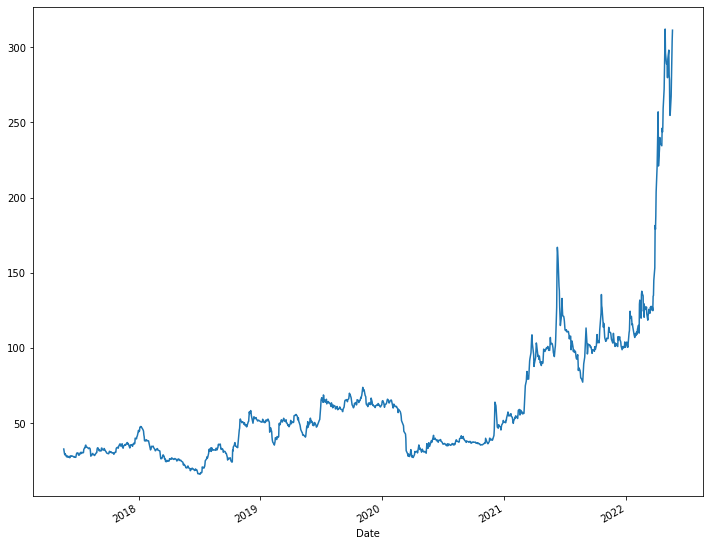

In [25]:
df_adani["High"].plot(figsize=(12,10))

<AxesSubplot:xlabel='Date'>

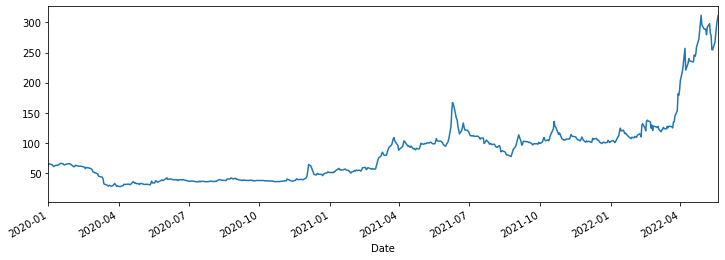

In [26]:
#X_Limits and Y_Limits
df_adani['High'].plot(xlim=['2020-01-01','2022-05-20'],figsize=(12,4))

In [27]:
df_adani.index

DatetimeIndex(['2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-29', '2017-05-30', '2017-05-31',
               '2017-06-01', '2017-06-02',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=1236, freq=None)

In [35]:
index=df_adani.loc['2020-01-01':'2022-05-20'].index
share_open=df_adani['2020-01-01':'2022-05-20']['Open']

In [36]:
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=593, freq=None)

In [37]:
share_open

Date
2020-01-01     61.799999
2020-01-02     64.000000
2020-01-03     64.400002
2020-01-06     63.000000
2020-01-07     60.349998
                 ...    
2022-05-16    267.350006
2022-05-17    280.700012
2022-05-18    294.700012
2022-05-19    286.950012
2022-05-20    307.000000
Name: Open, Length: 593, dtype: float64

In [38]:
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


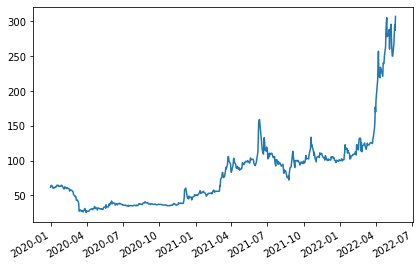

In [41]:
figure,axis=plt.subplots()
plt.tight_layout()
##preventing the overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [42]:
#datetimeindex
df_adani=df_adani.reset_index()

In [44]:
df_adani.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1236 non-null   datetime64[ns]
 1   High       1236 non-null   float64       
 2   Low        1236 non-null   float64       
 3   Open       1236 non-null   float64       
 4   Close      1236 non-null   float64       
 5   Volume     1236 non-null   int64         
 6   Adj Close  1236 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [55]:
df_adani=df_adani.set_index('Date',drop=True)

In [56]:
from datetime import datetime

In [57]:
datetime(2022,5,20)

datetime.datetime(2022, 5, 20, 0, 0)

In [58]:
datetime.now()

datetime.datetime(2022, 5, 20, 13, 49, 55, 792074)

# Time Resampling

In [59]:
df_adani.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-22,32.799999,31.100000,32.700001,31.450001,6438711,31.450001
2017-05-23,31.250000,29.700001,31.250000,29.850000,8810234,29.850000
2017-05-24,30.000000,27.850000,29.900000,28.000000,15417083,28.000000
2017-05-25,28.950001,27.400000,28.000000,28.650000,12744420,28.650000
2017-05-26,29.650000,28.299999,28.549999,28.900000,11266349,28.900000


In [60]:
df_adani.resample(rule='A').min()
#resampling the dataset means resetting the dataseet to increase the accuracy score 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,27.000000,25.850000,26.600000,26.700001,1234156,26.700001
2018-12-31,16.100000,15.150000,15.450000,15.450000,3416766,15.450000
2019-12-31,35.400002,33.349998,34.700001,33.950001,707471,33.950001
2020-12-31,27.150000,23.000000,25.549999,25.650000,440489,25.650000
2021-12-31,49.849998,48.500000,48.900002,49.000000,619476,49.000000
2022-12-31,100.400002,98.000000,99.500000,99.849998,1419672,99.849998


In [61]:
df_adani.resample(rule='A').max

<bound method f of <pandas.core.resample.DatetimeIndexResampler object at 0x000001EC07DC65E0>>

<AxesSubplot:xlabel='Date'>

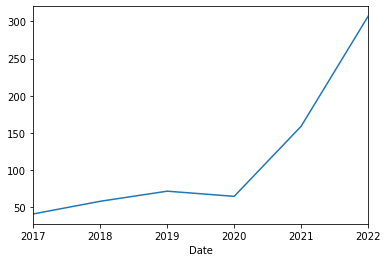

In [62]:
df_adani.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

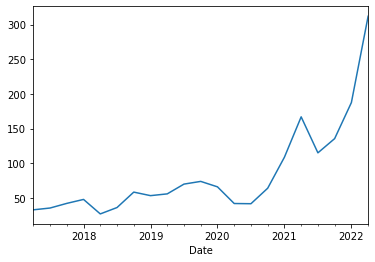

In [63]:
df_adani.resample(rule='QS').max()['High'].plot()

In [64]:
##Business End Frequency
df_adani.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,42.099998,40.599998,41.000000,41.700001,42047762,41.700001
2018-12-31,58.349998,55.700001,58.000000,57.849998,124345256,57.849998
2019-12-31,73.800003,70.250000,71.599998,71.599998,129393170,71.599998
2020-12-31,65.949997,64.199997,64.650002,64.949997,131879335,64.949997
2021-12-31,166.899994,153.000000,159.000000,154.100006,221394940,154.100006
2022-12-30,312.000000,305.100006,307.000000,311.000000,242199873,311.000000


In [65]:
df_adani.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-03,32.799999,31.100000,32.700001,31.450001,20070770,31.450001
2017-07-03,35.400002,33.250000,35.049999,34.950001,28734096,34.950001
2017-10-02,42.099998,40.599998,41.000000,41.700001,42047762,41.700001
2018-01-01,47.799999,46.500000,47.250000,46.950001,47663047,46.950001
2018-04-02,26.900000,26.000000,26.700001,26.600000,29555267,26.600000
2018-07-02,36.099998,34.250000,35.700001,35.400002,124345256,35.400002
2018-10-01,58.349998,55.700001,58.000000,57.849998,98162778,57.849998
2019-01-01,53.250000,51.400002,52.900002,52.299999,50291637,52.299999
2019-04-01,55.799999,53.750000,54.500000,54.599998,50231342,54.599998


C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)


AttributeError: 'Line2D' object has no property 'kind'

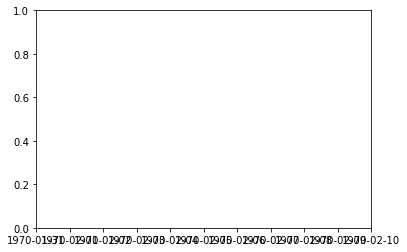

In [68]:
df_adani['Open'].resample(rule='A').mean().plot(Kind='bar')

<AxesSubplot:xlabel='Date'>

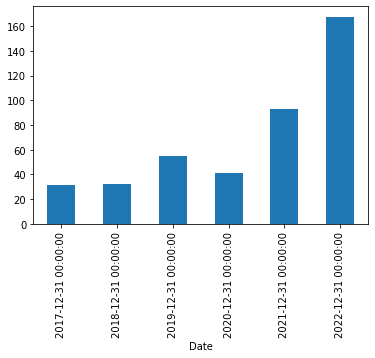

In [69]:
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

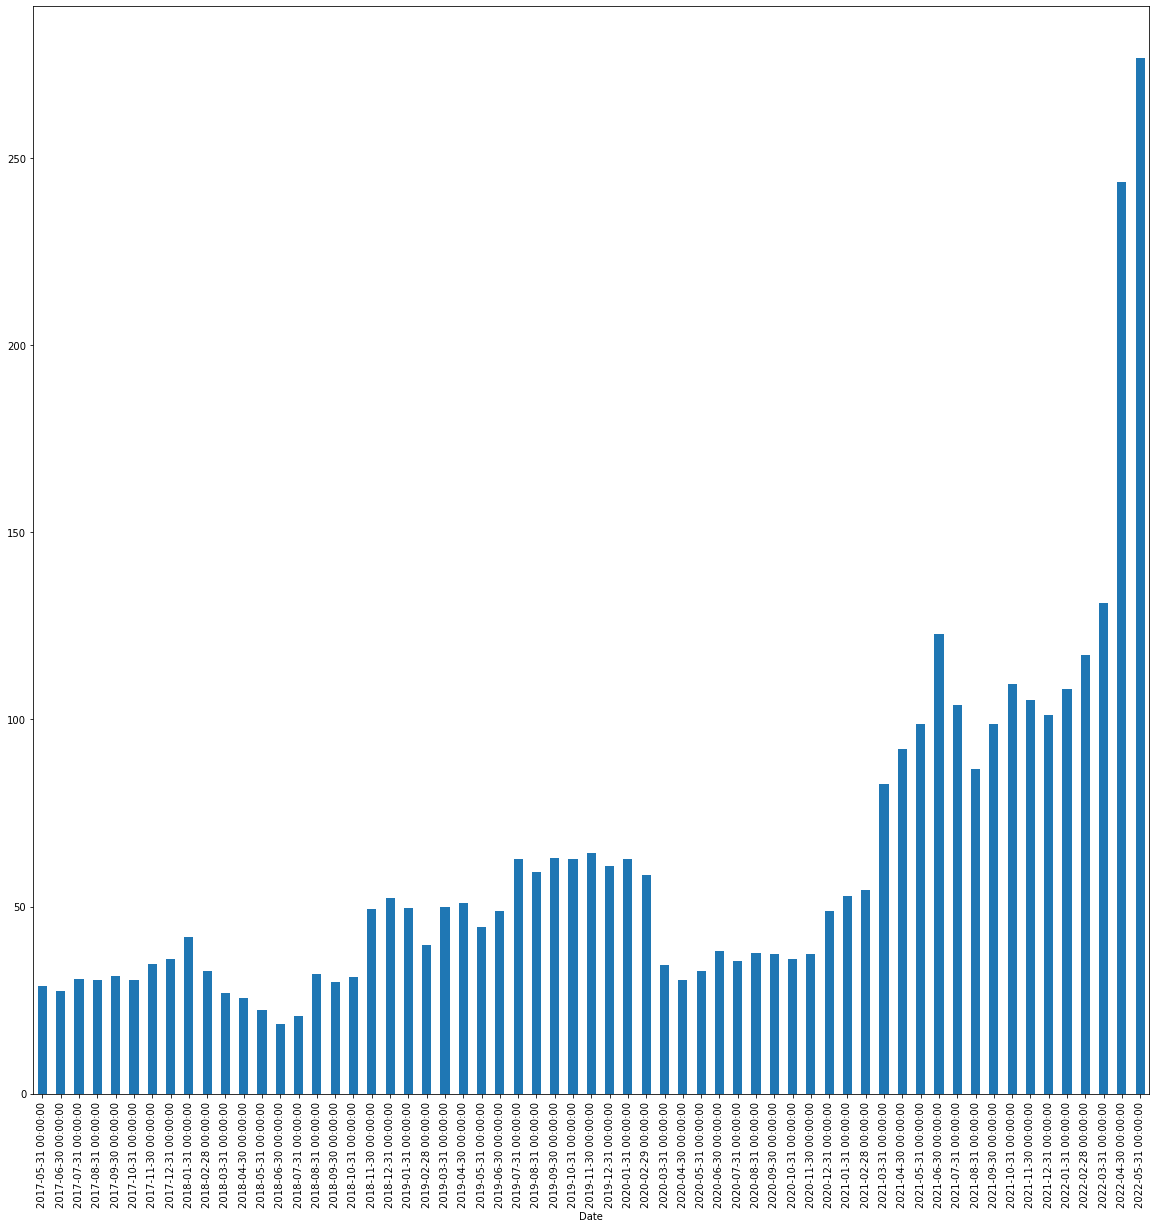

In [72]:
df_tesla['Open'].resample(rule='M').mean().plot(kind='bar',figsize=(20,20))


In [73]:
df_adani['Open:30 days rolling']=df_adani['Open'].rolling(30).mean()

In [74]:
df_adani.head()

,High,Low,Open,Close,Volume,Adj Close,Open:30 days rolling
Date,,,,,,,
2017-05-22,32.799999,31.100000,32.700001,31.450001,6438711,31.450001,NaN
2017-05-23,31.250000,29.700001,31.250000,29.850000,8810234,29.850000,NaN
2017-05-24,30.000000,27.850000,29.900000,28.000000,15417083,28.000000,NaN
2017-05-25,28.950001,27.400000,28.000000,28.650000,12744420,28.650000,NaN
2017-05-26,29.650000,28.299999,28.549999,28.900000,11266349,28.900000,NaN


<AxesSubplot:xlabel='Date'>

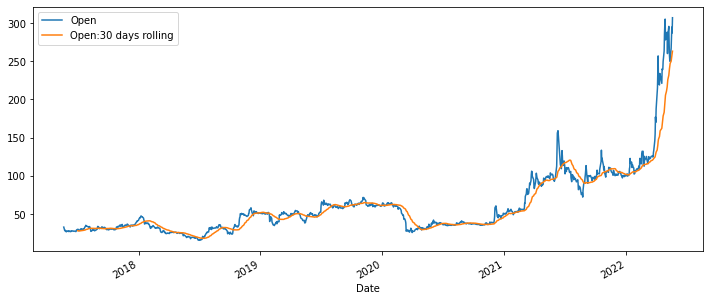

In [76]:
df_adani[['Open','Open:30 days rolling']].plot(figsize=(12,5))